# Summary of ENA CCN Data

In [1]:
import os

import numpy as np
import pandas as pd
import toolbox as tbx

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

In [2]:
data_directory = os.path.join(os.getenv("HOME"), 'Research', 'data', 'ENA')

In [3]:
CCN = tbx.fileIO.HDF.read_file(os.path.join(data_directory, 'enaaosccn.h5'), key='enaaosccn')

In [4]:
ccn = CCN.data.CCN
ss = CCN.data.SS

print('First Record: {}'.format(CCN.data.index[0]))
print('Last Record:  {}'.format(CCN.data.index[-1]))
print('Total Span:   {}'.format(CCN.data.index[-1]-CCN.data.index[0]))

CCN.data.describe()

First Record: 2013-10-04 03:51:42
Last Record:  2015-04-15 23:59:59
Total Span:   558 days 20:08:17


,CCN,SS
count,47882048.000000,47882048.000000
mean,199.091493,0.433776
std,273.856393,0.367979
min,0.000000,0.000000
25%,67.768051,0.100000
50%,151.128723,0.500000
75%,266.481934,0.800000
max,41218.078125,1.000000


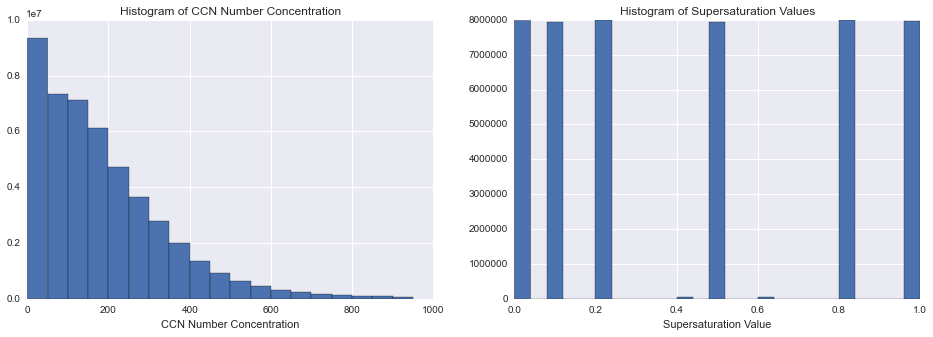

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

ccn.hist(ax=ax1, bins=np.arange(0, 1000, 50))
ax1.set_xlim(right=1000)
ax1.set_title('Histogram of CCN Number Concentration')
ax1.set_xlabel('CCN Number Concentration')

ss.hist(ax=ax2, bins=25)
ax2.set_xlabel('Supersaturation Value')
ax2.set_title('Histogram of Supersaturation Values')

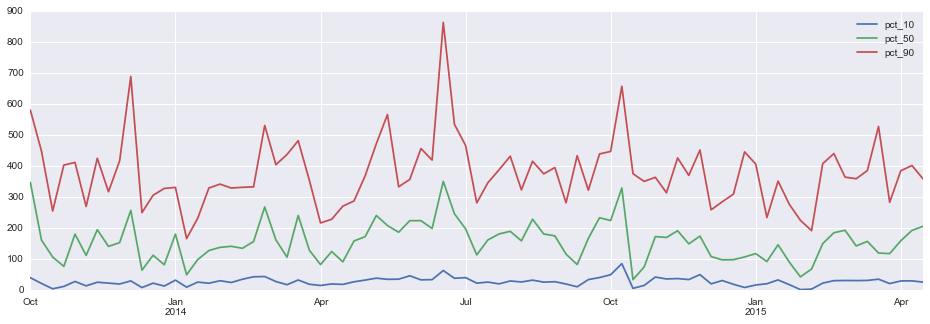

In [6]:
fig, ax = plt.subplots(figsize=(16, 5))

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'pct_%s' % n
    return percentile_

cn_tseries = (ccn[ccn < 1000]
              .groupby(pd.TimeGrouper('1W'))
              .agg([percentile(10), percentile(50), percentile(90)])
              .plot(ax=ax))